In [1]:
!pip install librosa 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename='UrbanSound8K/dog.mp3'

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

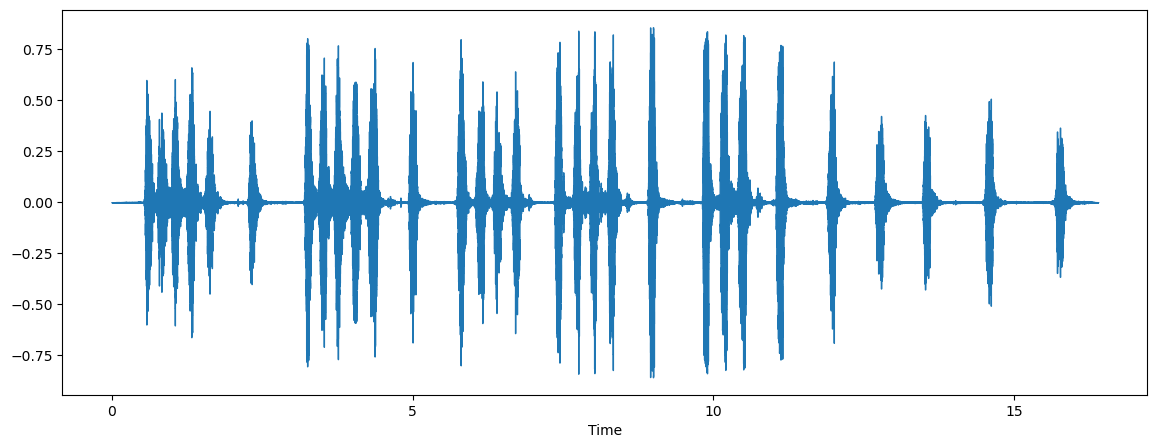

In [5]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
!dir


 Volume in drive C is Acer
 Volume Serial Number is E871-54AA

 Directory of C:\Users\Athar\Documents

28-04-2024  12:24    <DIR>          .
03-05-2024  16:15    <DIR>          ..
27-04-2024  17:35    <DIR>          .ipynb_checkpoints
27-04-2024  12:38            27,060 Ann project.ipynb
28-04-2024  12:24         1,676,425 Audio_project_ann.ipynb
21-02-2024  19:42             4,046 project 7.ipynb
27-04-2024  23:42    <DIR>          saved_models
01-02-2024  12:17            65,499 Untitled.ipynb
28-04-2024  11:44    <DIR>          UrbanSound8K
               4 File(s)      1,773,030 bytes
               5 Dir(s)  40,054,304,768 bytes free


In [7]:
import pandas as pd
df = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [8]:
df


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [9]:
df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [10]:
audio_file_path = "UrbanSound8K/audio/fold2/14387-9-0-15.wav"

In [11]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [12]:
wave_audio

array([[ 2370,  1427],
       [ 2535,  1449],
       [ 2619,  1527],
       ...,
       [-1572, -2477],
       [-1543, -2457],
       [-1472, -2434]], dtype=int16)

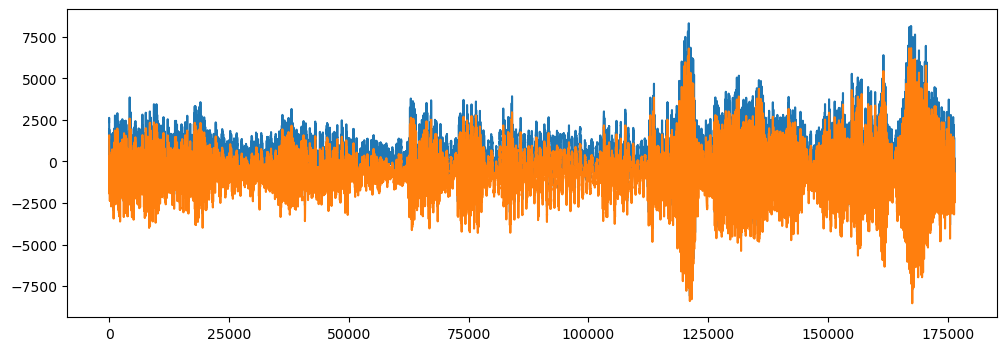

In [13]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

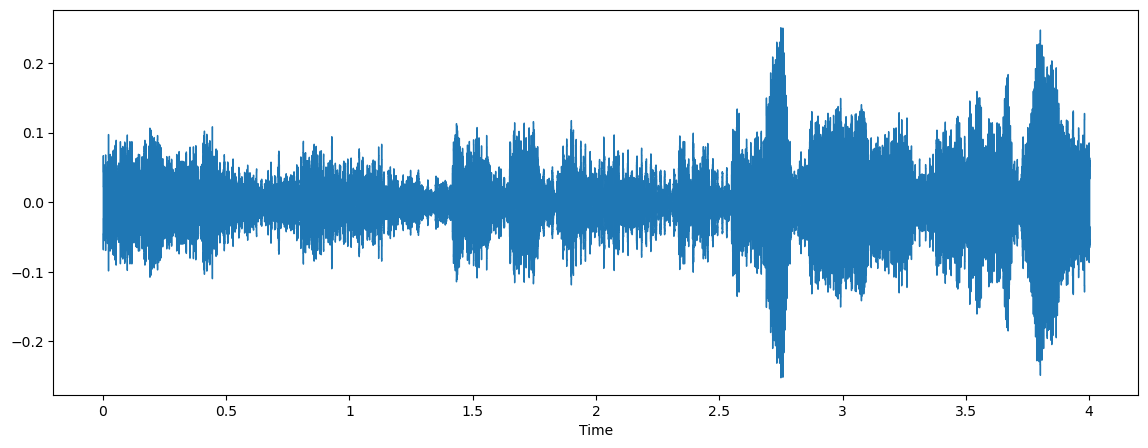

In [14]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(audio_file_path)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(audio_file_path)

In [15]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [16]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [17]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [03:08, 19.05it/s]C:\Users\Athar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [07:31, 26.14it/s]C:\Users\Athar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Athar\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:52, 18.50it/s]


In [18]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [19]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [20]:
X.shape

(8732, 40)

In [21]:
# ### Label Encoding
# y=np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [22]:
y.shape

(8732, 10)

In [23]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459471e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
X_train.shape

(6985, 40)

In [27]:
X_test.shape

(1747, 40)

In [28]:
y_train.shape

(6985, 10)

In [29]:
y_test.shape

(1747, 10)

In [30]:
!pip install tensorflow

In [31]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
### No of classes
num_labels=y.shape[1]

In [34]:
Dense(200)

<Dense name=dense, built=False>

In [35]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\Athar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [52]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
169/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7072 - loss: 0.8817
Epoch 1: val_loss improved from inf to 0.71631, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 0.8853 - val_accuracy: 0.7859 - val_loss: 0.7163
Epoch 2/100
168/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7042 - loss: 0.8979
Epoch 2: val_loss did not improve from 0.71631
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7024 - loss: 0.9008 - val_accuracy: 0.7676 - val_loss: 0.7234
Epoch 3/100
164/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6879 - loss: 0.9188
Epoch 3: val_loss did not improve from 0.71631
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6895 - loss: 0.9201 - val_accuracy: 0.7716 - val_loss: 0.7354
Epoch 4/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7032 - loss: 0.9033
Epoch 4: val_loss did not improve from 0.71631
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7007 - loss: 0.8900 - val_accuracy: 0.7687 - val_loss: 0.7407
Epoch 27/100
195/219 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7030 - loss: 0.8971
Epoch 27: val_loss improved from 0.71631 to 0.70770, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7033 - loss: 0.8974 - val_accuracy: 0.7773 - val_loss: 0.7077
Epoch 28/100
161/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7108 - loss: 0.8950
Epoch 28: val_loss improved from 0.70770 to 0.70695, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7105 - loss: 0.8934 - val_accuracy: 0.7813 - val_loss: 0.7069
Epoch 29/100
208/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7036 - loss: 0.8841
Epoch 29: val_loss did not improve from 0.70695
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7037 - loss: 0.8843 - val_accuracy: 0.7813 - val_loss: 0.7154


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7006 - loss: 0.8903 - val_accuracy: 0.7699 - val_loss: 0.7380
Epoch 52/100
184/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7172 - loss: 0.8633
Epoch 52: val_loss did not improve from 0.70527
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7168 - loss: 0.8639 - val_accuracy: 0.7739 - val_loss: 0.7149
Epoch 53/100
211/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7138 - loss: 0.8639
Epoch 53: val_loss did not improve from 0.70527
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7136 - loss: 0.8651 - val_accuracy: 0.7773 - val_loss: 0.7171
Epoch 54/100
177/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7077 - loss: 0.8860
Epoch 54: val_loss did not improve from 0.70527
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7074 - loss: 0.8887 - val_accuracy: 0.7739 - val_loss: 0.7163
Epoch 55/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6985 - loss: 0.8976
Epoch 55: val_loss did not improve f

Epoch 77/100
181/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7173 - loss: 0.8619
Epoch 77: val_loss did not improve from 0.69334
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7161 - loss: 0.8649 - val_accuracy: 0.7728 - val_loss: 0.7404
Epoch 78/100
205/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7042 - loss: 0.9102
Epoch 78: val_loss did not improve from 0.69334
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.9093 - val_accuracy: 0.7773 - val_loss: 0.7320
Epoch 79/100
198/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7187 - loss: 0.8174
Epoch 79: val_loss did not improve from 0.69334
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7182 - loss: 0.8197 - val_accuracy: 0.7762 - val_loss: 0.7224
Epoch 80/100
191/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7091 - loss: 0.8511
Epoch 80: val_loss did not improve from 0.69334
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7090 - loss: 0.8534 - val_accuracy: 0.7705 - val_l

In [53]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7733256816864014


In [58]:
filename = "UrbanSound8K/car.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Get predictions from the model
predictions_label = np.argmax(model.predict(mfccs_scaled_features), axis=1)

# predicted_label = np.squeeze(predicted_label)
# print(predicted_label.shape)
# Assuming labelencoder is an instance of LabelEncoder
print(predictions_label)
from sklearn.preprocessing import LabelEncoder
# Create and fit the LabelEncoder instance
labelencoder = LabelEncoder()
labelencoder.fit_transform(predictions_label)

# Now you can use it for inverse transformation
prediction_class = labelencoder.inverse_transform(predictions_label) 
print(prediction_class)


[-2.0576794e+02  1.3487325e+02 -2.0555834e+01  3.5180454e+01
  4.0552430e+00  2.0324699e+01 -9.2753315e+00  6.5238862e+00
 -9.4048328e+00  2.4555540e+01  3.3341169e+00  2.0169050e+01
  1.8063612e+00  1.3379697e+01  6.8005353e-01  1.4702030e+01
  2.6097863e+00  8.8631277e+00  1.9943494e+00  1.0717881e+01
  7.7408075e+00  7.6342888e+00  3.8816905e+00  1.2639301e+01
  5.0445285e+00  3.0131691e+00  8.6082345e-01  3.7445912e+00
 -2.7289619e+00 -8.6452878e-01  2.9863691e+00 -2.8112452e+00
 -7.3420262e-01  3.2396238e+00  8.8772213e-01  1.3463235e+00
  1.1175268e+00  1.2318165e-03  5.0054369e+00  3.4696963e+00]
[[-2.0576794e+02  1.3487325e+02 -2.0555834e+01  3.5180454e+01
   4.0552430e+00  2.0324699e+01 -9.2753315e+00  6.5238862e+00
  -9.4048328e+00  2.4555540e+01  3.3341169e+00  2.0169050e+01
   1.8063612e+00  1.3379697e+01  6.8005353e-01  1.4702030e+01
   2.6097863e+00  8.8631277e+00  1.9943494e+00  1.0717881e+01
   7.7408075e+00  7.6342888e+00  3.8816905e+00  1.2639301e+01
   5.0445285e+00 

ValueError: y contains previously unseen labels: [9]

In [43]:
df = metadata['class'].drop_duplicates()

In [44]:
df

0              dog_bark
1      children_playing
9              car_horn
22      air_conditioner
94         street_music
106            gun_shot
114               siren
122       engine_idling
171          jackhammer
196            drilling
Name: class, dtype: object